# Validation of IMU-based calculation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nvg.ximu.ximudata as ximudata
import nvg.ximu.compare_to_mocap as compare
%matplotlib notebook

In [2]:
import nvg.io.qualisys_tsv as qtsv

In [3]:
compare.xdb.estimate_joint_axes("S4", "N", ["LA", "LT"])

(array([-0.19148914, -0.27131143,  0.94325077]),
 array([-0.05066031, -0.42137581,  0.90547002]))

In [11]:
compare.xdb.estimate_joint_center("S5", "N", ["LA", "LT"], startTime=220, anTime=40)

(array([-0.16063244,  0.00728971, -0.10578009]),
 array([-0.03517848, -0.00958635, -0.06271303]))

Subject S4 trial N
2012-09-19 11:11:37.528000
2012-09-19, 09:53:12.302938
Joint axes used in the calculation
[-0.3337891  -0.13176466  0.93339323]
[-0.01403522 -0.42774965  0.90378828]


<IPython.core.display.Javascript object>


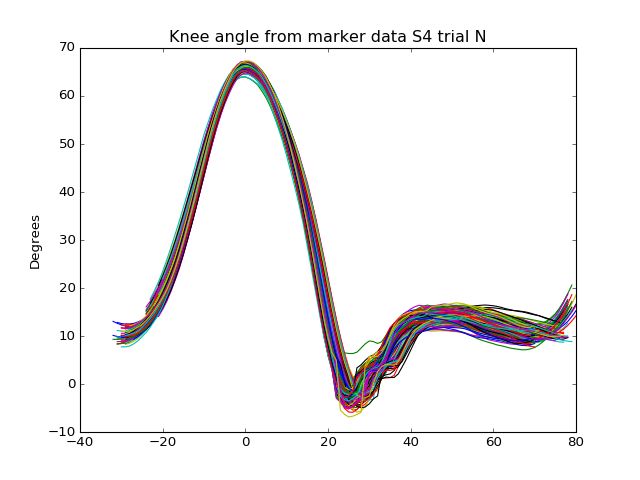

<IPython.core.display.Javascript object>


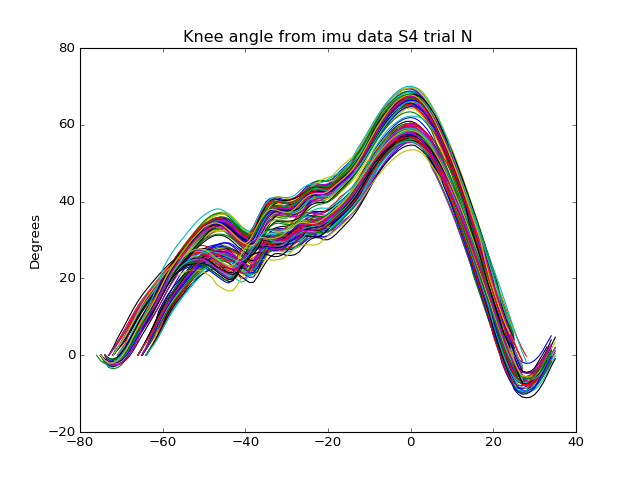

/home/kjartan/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/kjartan/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


<IPython.core.display.Javascript object>


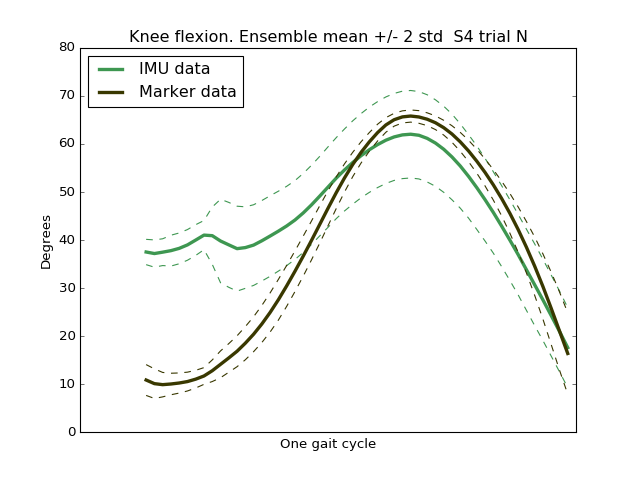

Subject S4 trial D
2012-09-19 11:30:58.122000
2012-09-19, 09:53:12.302938
Joint axes used in the calculation
[ 0.24761605  0.09785365  0.96390402]
[ 0.01129477 -0.8076      0.58962248]


<IPython.core.display.Javascript object>


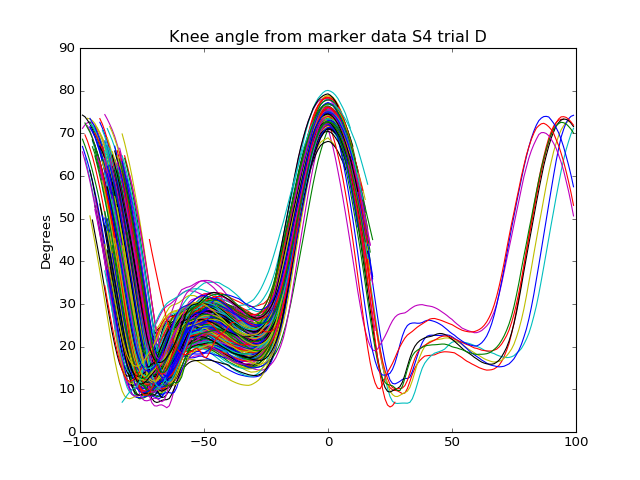

<IPython.core.display.Javascript object>


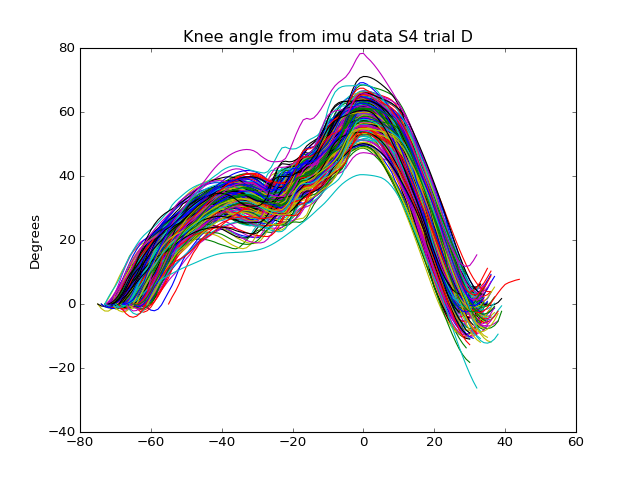

<IPython.core.display.Javascript object>


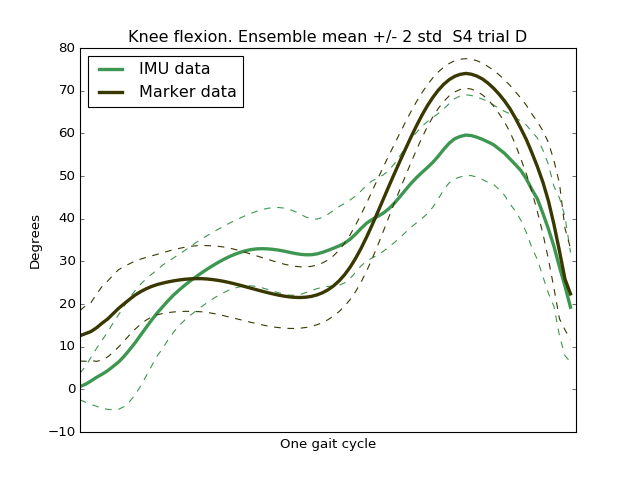

In [5]:
import pdb
#compare.xdb.rotationEstimator = compare.xdb.GyroIntegratorOrientation(262.)
compdata = compare.markerdata_list()
compare.main_2017(compdata[:2])

In [ ]:
compare.xdb.estimate_joint_center_matlab("S4", "N", ["LA", "LT"])

In [ ]:
compare.xdb.check_sync("S12", figsize=(10,20), dtaLength=120)

In [ ]:
pdb.pm()

In [ ]:
import pdb
syncfiles = compare.markerdata_sync_list()
for (key, val) in syncfiles.iteritems():
    compare.check_sync(val)


In [ ]:
import pdb
mdfiles = compare.markerdata_list()
compare.plot_marker_data(mdfiles[-1:])

In [ ]:
#md = qtsv.loadQualisysTSVFile("/home/kjartan/Dropbox/projekt/nvg/data/solna09/S7/NVG_2012_S7_sync.tsv")

In [ ]:
#synctime = md.timeStamp + datetime.timedelta(seconds=5199.0/md.frameRate)

In [ ]:
a = (1,2,3,4)
a[-1:]

In [ ]:
import pdb
compare.main_2017()

In [ ]:
# Check the the correspondence between packet number and time
import numpy as np
from datetime import datetime, timedelta, date
fname = ("/media/ubuntu-15-10/home/kjartan/nvg/2012-09-19-S4/" 
        + "S4/LA-200/NVG_2012_S4_A_LA_00203_DateTime.csv")
packetTimeRaw = np.loadtxt(fname, dtype=np.int32, delimiter=',', skiprows=1)
times = [ datetime(year=pt_[1], month=pt_[2], day=pt_[3], 
                   hour=pt_[4], minute=pt_[5], second=pt_[6]) 
         for pt_ in packetTimeRaw ]
packetTime = np.asarray([ (packetTimeRaw[k,0]-packetTimeRaw[0,0], 
                           (times[k]-times[0]).total_seconds()) 
                         for k in range(len(times))])

In [ ]:
Dp = (packetTime[-1,0] - packetTime[0,0])
Dt = (packetTime[-1,1] - packetTime[0,1])
freq = Dp/Dt
print freq


In [ ]:
from datetime import datetime, timedelta, date
timestampSync = datetime.strptime("2012-09-24, 16:52:59", "%Y-%m-%d, %H:%M:%S")
timestampRef = datetime.strptime("2012-09-24, 18:01:45", "%Y-%m-%d, %H:%M:%S")

floatSync = 267828.75835598
floatRef = 271955.08704553

dTime = timestampRef - timestampSync
dTimeFloat = floatRef - floatSync

print dTime
print dTimeFloat

In [ ]:
dTime.total_seconds()

In [ ]:
sfreq = compare.xdb.hdfFile.attrs['packetNumbersPerSecond']
print sfreq
type(sfreq)

<IPython.core.display.Javascript object>


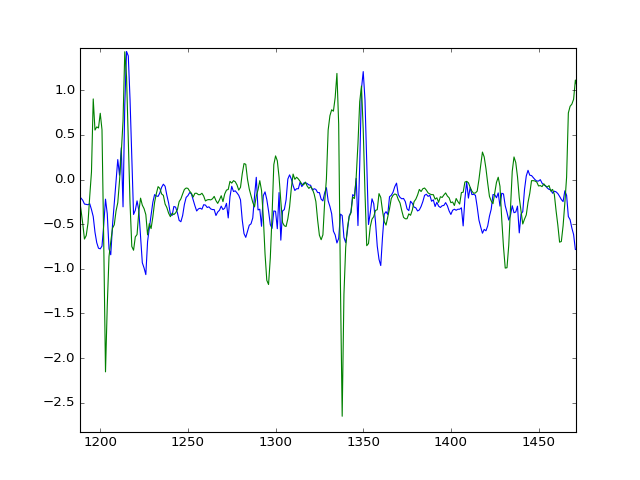

In [15]:
startTime = 120
anTime = 20
[la, t, s] = compare.xdb.get_imu_data("S4", "N", "LA", 
                                      startTime=startTime, anTime=anTime)
[ls, t, s] = compare.xdb.get_imu_data("S4", "N", "LT", 
                                      startTime=startTime, anTime=anTime)
accLA = la[:, 4:7]
accLT = ls[:,4:7]
plt.figure()
#plt.plot(np.mean(accLA**2, axis=1))
#plt.plot(np.mean(accLT**2, axis=1))
plt.plot(accLA[:,-1])
plt.plot(accLT[:,-1])


In [17]:
syncLT = compare.xdb.get_PN_at_sync("S4","LT")
syncLA = compare.xdb.get_PN_at_sync("S4","LA")

print syncLT-syncLA
print ls[0,0] - la[0,0]

[-560. -337.]
-559.0


In [ ]:
import itertools
import pdb
[la, t, s] = compare.xdb.get_imu_data("S10", "N", "LA", split=True)
[lt, t, s] = compare.xdb.get_imu_data("S10", "N", "RA", split=True)
plt.figure()
for (la_, lt_) in itertools.izip(la[:40], lt[:40]):
    accLA = la_[:, 4:7]
    accLT = lt_[:,4:7]
    plt.subplot(211)
    #plt.plot(np.mean(accLA**2, axis=1))
    plt.plot(accLA[:,-1])
    plt.subplot(212)
    #plt.plot(np.mean(accLT**2, axis=1))
    plt.plot(accLT[:,-1])


In [ ]:
[la, t, s] = compare.xdb.get_imu_data("S4", "D", "LA", startTime=None, anTime=120)
la

In [ ]:
print la[0,0]
print syncLA

In [ ]:

[ra, t, s] = compare.xdb.get_imu_data("S4", "D", "RA")
accLA = la[:, 4:7]
accLT = ls[:,4:7]
plt.figure()
plt.plot(np.mean(accLA**2, axis=1))
plt.plot(np.mean(accLT**2, axis=1))

In [ ]:
ximudata.plot_sync()

In [ ]:
None < 0

In [ ]:
subj = compare.xdb.hdfFile['S4']
len(subj)

In [ ]:
imus = compare.xdb.hdfFile['S4']['N']

In [ ]:
imus

In [ ]:
for k in imus.iterkeys():
    print k



In [ ]:
a = np.arange(12)
a.shape=(4,3)

v = np.array([1,1,1])

np.cross(a, v)
print a

In [ ]:
np.outer(t,g)

In [ ]:
a = np.arange(12).reshape(4,3)
np.linalg.norm(a, axis=1)
a

In [ ]:
np.linalg.norm([0,1,2])